In [1]:
import os
os.chdir("../../../")

In [2]:
import torch
from torchts.nn.models.ode import ODESolver
import numpy as np

import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [10]:
# Duffing equation: Second order ODE system
dt = 0.01

def x_prime(prev_val, coeffs):
    return prev_val["x_"]

def x_prime_prime(prev_val, coeffs):
    return coeffs["g"]*torch.cos(coeffs["w"]*prev_val["t"]) - coeffs["d"]*prev_val["x_"] - coeffs["a"]*prev_val["x"] - coeffs["b"]*prev_val["x"]*prev_val["x"]*prev_val["x"]

def t_prime(prev_val, coeffs):
    return 1

ode = {"x": x_prime, "x_": x_prime_prime, "t": t_prime}

# Initial conditions [0,0,0]
ode_init = {"x": 0, "x_": 0, "t": 0}

# Constants (Parameters)
ode_coeffs = {"a": 0.1, "b": 0.5, "d": 0.2, "g": 0.8, "w": 0.5}


# 4th Order Runge-Kutta - Data Generation for nt = 1000

In [11]:
ode_solver = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_coeffs,
    dt=dt,
    solver="rk4",
    optimizer=None
)

result = ode_solver(1000)

In [12]:
result

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [3.9973e-05, 7.9920e-03, 1.0000e-02],
        [1.5979e-04, 1.5968e-02, 2.0000e-02],
        ...,
        [1.3451e-01, 1.5991e-01, 9.9701e+00],
        [1.3612e-01, 1.6162e-01, 9.9801e+00],
        [1.3774e-01, 1.6335e-01, 9.9901e+00]], grad_fn=<StackBackward>)

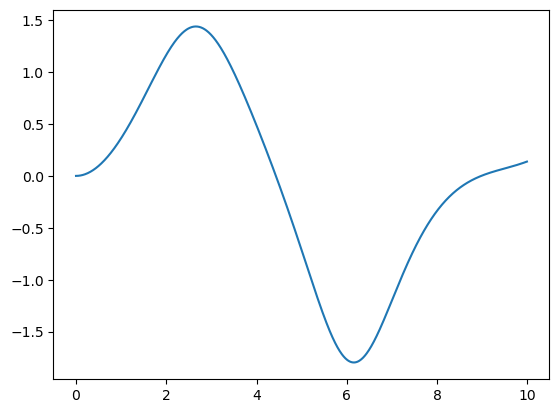

In [13]:
result_np = result.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(result_np[:,2], result_np[:,0])

plt.show()

# Euler's method for training

In [14]:
ode_train_coeffs = {"a": 0., "b": 0., "d": 0., "g": 0., "w": 1.}

ode_solver_train = ODESolver(
    ode=ode,
    init_vars=ode_init,
    init_coeffs=ode_train_coeffs,
    dt=dt,
    solver="euler",
    optimizer=None
)

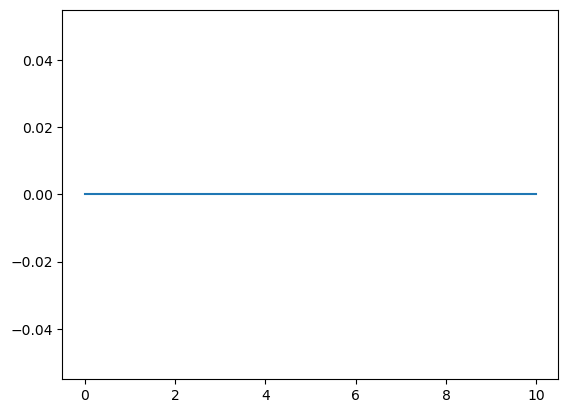

In [15]:
results_test = ode_solver_train(1000)
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot of X and Z
plt.plot(results_test_np[:,2], results_test_np[:,0])

plt.show()

In [16]:
ode_solver_train.fit(
    result,torch.optim.Adam,
    {"lr": 0.1},
    max_epochs=100
)

ad=True), 'w': Parameter containing:
tensor(0.9047, requires_grad=True)}
Epoch: 47	 Loss: tensor(0.0730, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.2699, requires_grad=True), 'b': Parameter containing:
tensor(-0.1399, requires_grad=True), 'd': Parameter containing:
tensor(0.4409, requires_grad=True), 'g': Parameter containing:
tensor(0.9334, requires_grad=True), 'w': Parameter containing:
tensor(0.9002, requires_grad=True)}
Epoch: 48	 Loss: tensor(0.0748, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.2592, requires_grad=True), 'b': Parameter containing:
tensor(-0.1308, requires_grad=True), 'd': Parameter containing:
tensor(0.4554, requires_grad=True), 'g': Parameter containing:
tensor(0.9225, requires_grad=True), 'w': Parameter containing:
tensor(0.9166, requires_grad=True)}
Epoch: 49	 Loss: tensor(0.0563, grad_fn=<MseLossBackward>)
{'a': Parameter containing:
tensor(0.2477, requires_grad=True), 'b': Parameter containing:
tensor(-0.1236, requires_

In [17]:
ode_solver_train.coeffs

# Awful results

{'a': Parameter containing:
 tensor(0.1319, requires_grad=True),
 'b': Parameter containing:
 tensor(0.0416, requires_grad=True),
 'd': Parameter containing:
 tensor(-0.0651, requires_grad=True),
 'g': Parameter containing:
 tensor(0.8485, requires_grad=True),
 'w': Parameter containing:
 tensor(1.0743, requires_grad=True)}

# Predictions for nt = 10000

In [18]:
results_test = ode_solver_train(10000)
results_test

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 8.4848e-03, 1.0000e-02],
        [8.4848e-05, 1.6975e-02, 2.0000e-02],
        ...,
        [       nan,        nan, 9.9973e+01],
        [       nan,        nan, 9.9983e+01],
        [       nan,        nan, 9.9993e+01]], grad_fn=<StackBackward>)

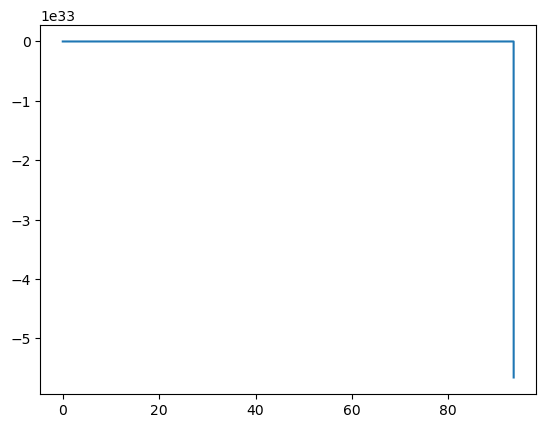

In [19]:
results_test_np = results_test.detach().numpy() # Convert to numpy array

# 2D plot
plt.plot(results_test_np[:,2], results_test_np[:,0])

plt.show()

# Save results as .mat file

In [20]:
import scipy.io

scipy.io.savemat("Duffing_fit.mat", {"x": results_test_np})